<a href="https://colab.research.google.com/github/DiegoOCruz/Artificial-Clusteriza-o/blob/main/TP2_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

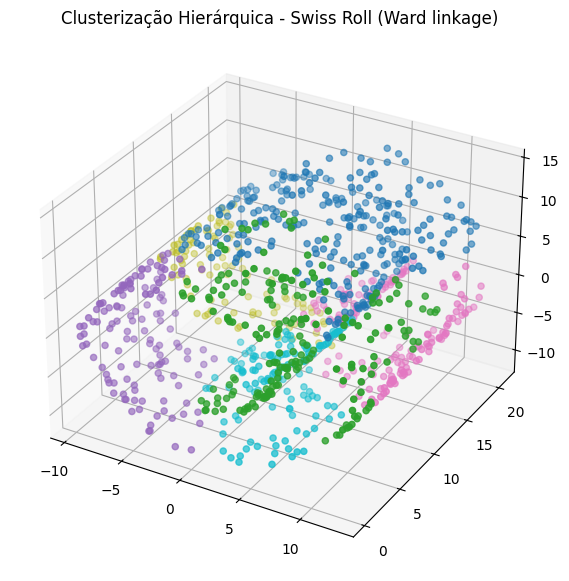

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Gerar dados swiss roll
X, _ = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

# 2. Normalizar
X_scaled = StandardScaler().fit_transform(X)

# 3. Clusterização hierárquica (Agglomerative Clustering)
cluster = AgglomerativeClustering(n_clusters=6, linkage="ward")
labels = cluster.fit_predict(X_scaled)

# 4. Visualização em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap="tab10", s=20)
ax.set_title("Clusterização Hierárquica - Swiss Roll (Ward linkage)")
plt.show()


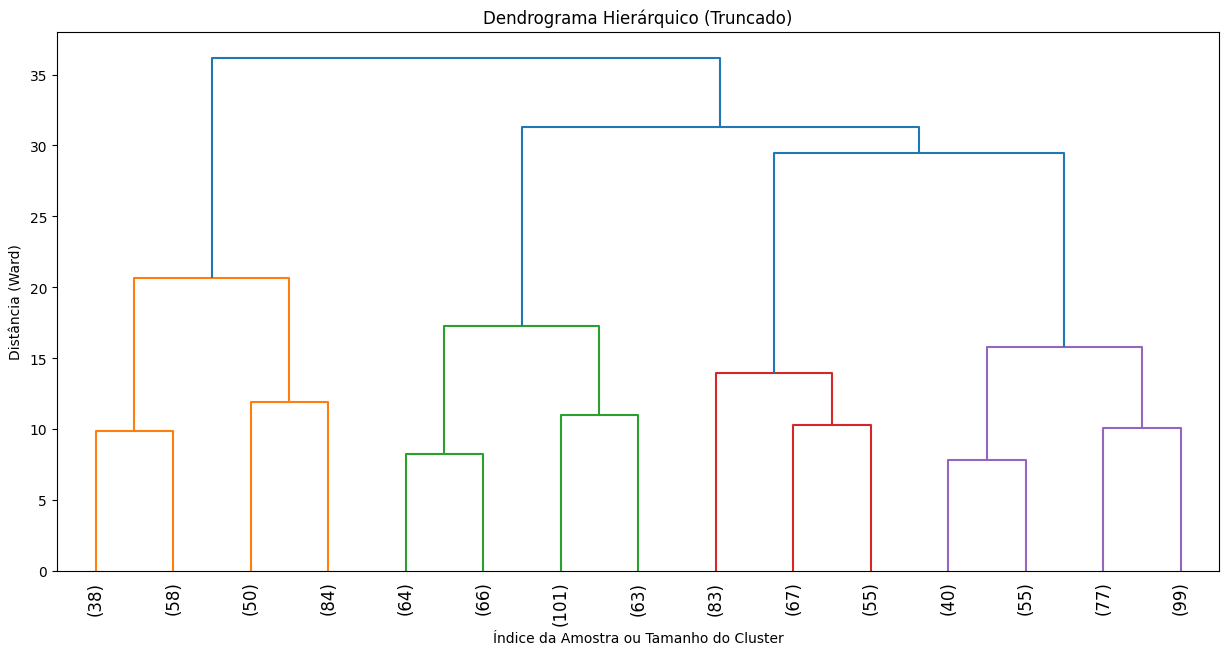

In [ ]:
# 3. Calcular a matriz de ligação para o dendrograma
# Usamos o mesmo método 'ward' que você especificou
linked = linkage(X_scaled, method='ward')

# 4. Visualização do Dendrograma
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           truncate_mode='lastp',  # Mostra apenas as últimas 'p' fusões
           p=15,                   # O número de fusões a serem mostradas
           show_leaf_counts=True,  # Mostra o n° de amostras em cada cluster
           leaf_rotation=90.,
           leaf_font_size=12.)

plt.title('Dendrograma Hierárquico (Truncado)')
plt.xlabel('Índice da Amostra ou Tamanho do Cluster')
plt.ylabel('Distância (Ward)')
plt.show()

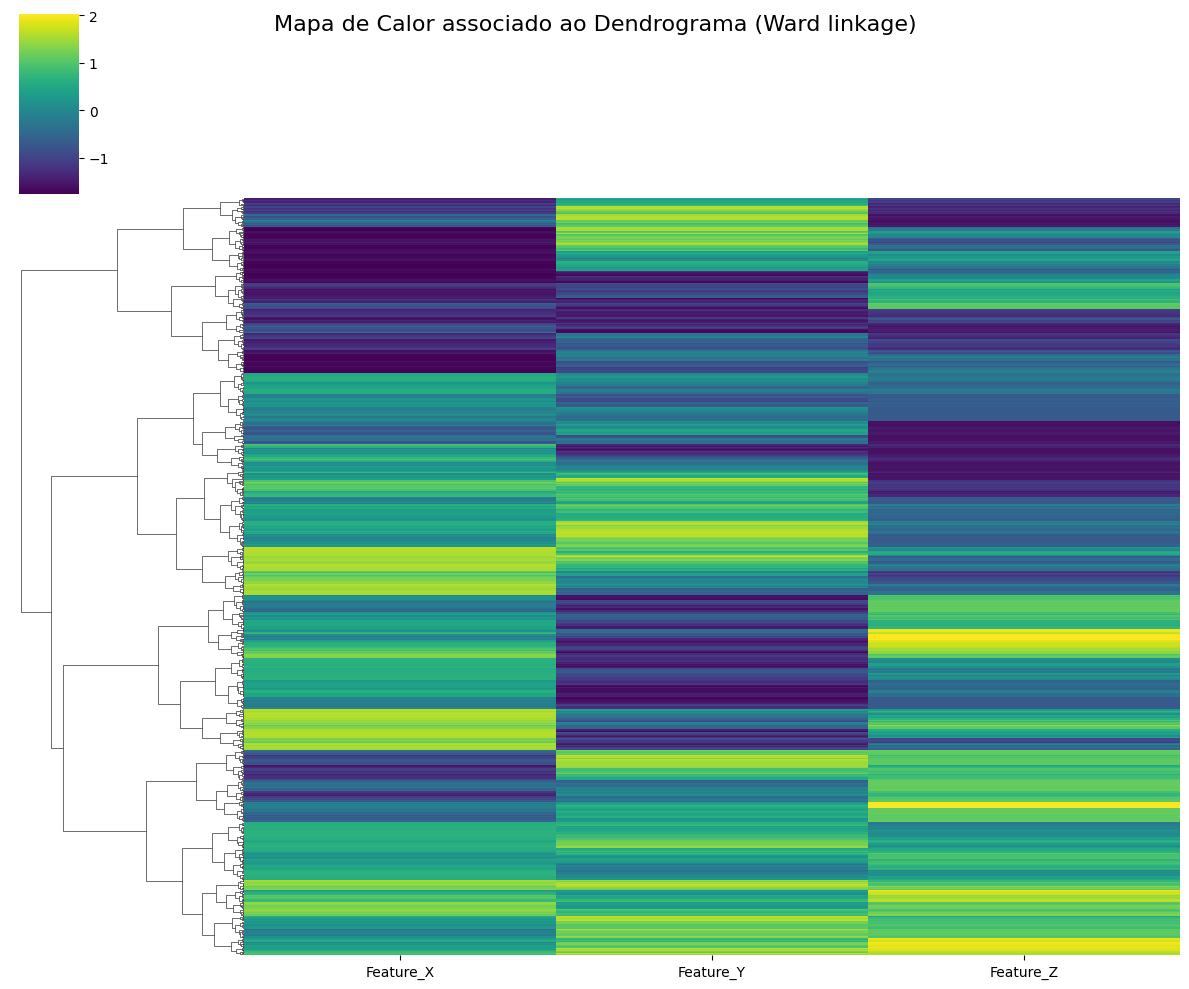

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(X_scaled, columns=['Feature_X', 'Feature_Y', 'Feature_Z'])

# Usar a matriz de ligação calculada no dendrograma
g = sns.clustermap(df,
                   row_linkage=linked,   # Usa o linkage ward já calculado
                   col_cluster=False,    # Não clusterizar colunas
                   cmap="viridis",       # Paleta de cores
                   yticklabels=False,    # Esconde rótulos
                   figsize=(12, 10))

g.fig.suptitle("Mapa de Calor associado ao Dendrograma (Ward linkage)", fontsize=16)
plt.show()


Questão 10:


O dendrograma obtido na questão 8 mostra o processo de agrupamento hierárquico das amostras do conjunto Swiss Roll. Observa-se que os pontos foram sendo unidos em diferentes níveis de distância, revelando a formação de agrupamentos locais que refletem a estrutura em “rolo” do dataset.

Já o mapa de calor da questão 9 complementa essa análise ao reorganizar as amostras conforme a hierarquia do dendrograma. Isso permite visualizar que amostras próximas no dendrograma apresentam padrões semelhantes nas variáveis padronizadas. Em outras palavras, os blocos de cores mais homogêneas no heatmap correspondem aos clusters identificados pelo método Ward.

Assim, os resultados indicam que o procedimento de clusterização hierárquica conseguiu identificar agrupamentos coerentes com a estrutura espacial dos dados, agrupando pontos que pertencem a regiões próximas do Swiss Roll. O dendrograma fornece uma visão hierárquica das fusões, enquanto o mapa de calor evidencia a similaridade interna dos grupos formados.

Questão 11:

Para determinar o número de clusters, observa-se o dendrograma resultante da clusterização hierárquica. A cada etapa, grupos de amostras são unidos conforme a distância entre eles. O número de clusters pode ser definido identificando o maior “salto” na altura das fusões e traçando uma linha horizontal nessa altura. O número de segmentos que essa linha cruza corresponde ao número de clusters. Esse procedimento é equivalente ao método do “cotovelo”, aplicado especificamente à estrutura hierárquica.

Questão 12:

Na questão 7, o modelo foi ajustado para produzir 6 clusters. Ao analisar o dendrograma (questão 11), observa-se que um corte adequado na altura das fusões principais também indicaria aproximadamente 5 a 7 agrupamentos bem definidos. Portanto, o número de clusters obtido pelo modelo está de acordo com o esperado. Isso confirma que os agrupamentos identificados são consistentes com a estrutura do Swiss Roll, representando regiões contínuas do “rolo” de pontos no espaço tridimensional.